### Author: Yasir Abdurrahman

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df_train = pd.read_csv('dataset2/train2.csv')

## Dataset
### Description
Dataset 2 berikut merupakan data loan 1000 nasabah bank dengan variabel target pada data ini adalah `default`, variabel biner yang menjadi indikasi loan/ pinjaman lunas (berhasil dilunasi pembayarannya) atau tidak.

### Variables Glossary
- `checking_balance` dan `savings_balance`: Status dari account checking/saving
- `credit_history`: kategori histori kredit meliputi critical, good, perfect, poor atau very good
- `purpose`: tujuan kredit untuk car(new), car(used), education, furniture atau renovations
- `employment_duration`: lama bekerja
- `percent_of_income`: Installment rate dalam persentase disposable income
- `years_at_residence`: lama tinggal
- `age`: usia nasabah
- `other_credit`: installment/ cicilan lainnya
- `housing`: kategori status tempat tinggal meliputi rent, own, atau free
- `job`: jenis perkerjaan masuk dalam kategori management, skilled, unskilled atau unemployed
- `dependents`: banyaknya tanggungan
- `phone`: status registrasi nomer telefon
- **default**: status pembayaran default or non-default

In [3]:
df_train.head()

,Unnamed: 0,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,508,1 - 200 DM,15,very good,car,6850,100 - 500 DM,unemployed,1,2,34,none,own,1,management,2,yes,yes
1,307,unknown,30,good,car,4811,unknown,4 - 7 years,2,4,24,store,rent,1,unskilled,1,no,no
2,427,unknown,28,critical,furniture/appliances,2743,< 100 DM,> 7 years,4,2,29,none,own,2,skilled,1,no,no
3,692,1 - 200 DM,15,good,renovations,2631,100 - 500 DM,1 - 4 years,3,2,25,none,own,1,unskilled,1,no,no
4,85,< 0 DM,10,good,furniture/appliances,2315,< 100 DM,> 7 years,3,4,52,none,own,1,unskilled,1,no,no


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 18 columns):
Unnamed: 0              900 non-null int64
checking_balance        900 non-null object
months_loan_duration    900 non-null int64
credit_history          900 non-null object
purpose                 900 non-null object
amount                  900 non-null int64
savings_balance         900 non-null object
employment_duration     900 non-null object
percent_of_income       900 non-null int64
years_at_residence      900 non-null int64
age                     900 non-null int64
other_credit            900 non-null object
housing                 900 non-null object
existing_loans_count    900 non-null int64
job                     900 non-null object
dependents              900 non-null int64
phone                   900 non-null object
default                 900 non-null object
dtypes: int64(8), object(10)
memory usage: 126.6+ KB


## Question 7
Variabel apa yang menjadi variabel paling tidak penting (most unimportant variable) dalam menentukan status default nasabah dalam model decision tree tersebut?

**Answer**: `existing_loans_count`

In [5]:
df_train['checking_balance'].value_counts()

unknown       360
1 - 200 DM    242
< 0 DM        238
> 200 DM       60
Name: checking_balance, dtype: int64

In [6]:
df_train['other_credit'].value_counts()

none     732
bank     127
store     41
Name: other_credit, dtype: int64

In [7]:
df_train['existing_loans_count'].describe()

count    900.000000
mean       1.411111
std        0.575635
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: existing_loans_count, dtype: float64

# Explore Dataset

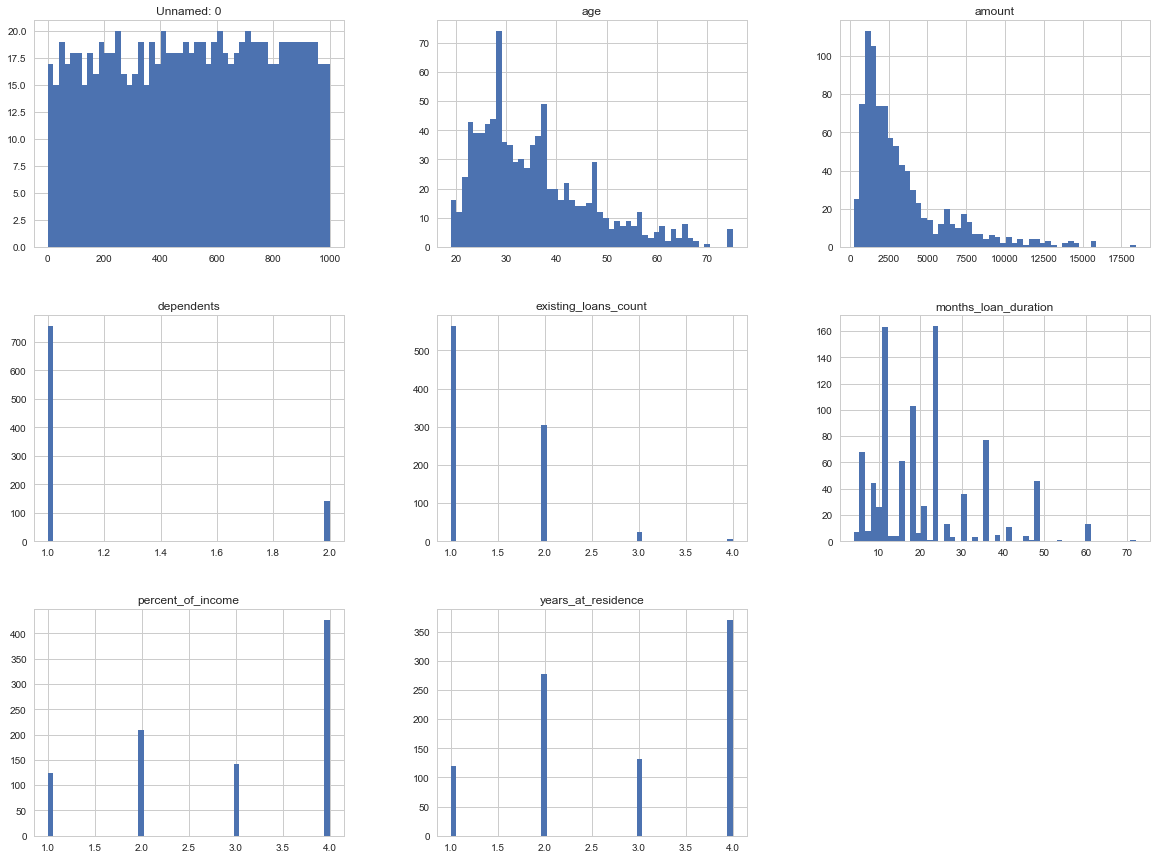

In [8]:
%matplotlib inline
df_train.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
used_variables = ['checking_balance', 'savings_balance', 'credit_history', 'purpose', 'employment_duration', 'percent_of_income',
                  'years_at_residence', 'age', 'other_credit', 'housing', 'job', 'dependents', 'phone', 'default']

nasabah = df_train[used_variables]

In [10]:
nasabah.head()

,checking_balance,savings_balance,credit_history,purpose,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,job,dependents,phone,default
0,1 - 200 DM,100 - 500 DM,very good,car,unemployed,1,2,34,none,own,management,2,yes,yes
1,unknown,unknown,good,car,4 - 7 years,2,4,24,store,rent,unskilled,1,no,no
2,unknown,< 100 DM,critical,furniture/appliances,> 7 years,4,2,29,none,own,skilled,1,no,no
3,1 - 200 DM,100 - 500 DM,good,renovations,1 - 4 years,3,2,25,none,own,unskilled,1,no,no
4,< 0 DM,< 100 DM,good,furniture/appliances,> 7 years,3,4,52,none,own,unskilled,1,no,no


In [11]:
nasabah.isnull().sum()

checking_balance       0
savings_balance        0
credit_history         0
purpose                0
employment_duration    0
percent_of_income      0
years_at_residence     0
age                    0
other_credit           0
housing                0
job                    0
dependents             0
phone                  0
default                0
dtype: int64

In [12]:
nasabah.describe()

,percent_of_income,years_at_residence,age,dependents
count,900.000000,900.000000,900.000000,900.000000
mean,2.964444,2.835556,35.514444,1.158889
std,1.122558,1.107996,11.306962,0.365776
min,1.000000,1.000000,19.000000,1.000000
25%,2.000000,2.000000,27.000000,1.000000
50%,3.000000,3.000000,33.000000,1.000000
75%,4.000000,4.000000,42.000000,1.000000
max,4.000000,4.000000,75.000000,2.000000


# Preprocessing Data Train

**Note**: Preprocessing can be optimize using Pipeline for simplicty of codes

## Categorical Data

In [13]:
cat_nasabah = nasabah.select_dtypes(include=['object']).copy()
cat_nasabah.head()

,checking_balance,savings_balance,credit_history,purpose,employment_duration,other_credit,housing,job,phone,default
0,1 - 200 DM,100 - 500 DM,very good,car,unemployed,none,own,management,yes,yes
1,unknown,unknown,good,car,4 - 7 years,store,rent,unskilled,no,no
2,unknown,< 100 DM,critical,furniture/appliances,> 7 years,none,own,skilled,no,no
3,1 - 200 DM,100 - 500 DM,good,renovations,1 - 4 years,none,own,unskilled,no,no
4,< 0 DM,< 100 DM,good,furniture/appliances,> 7 years,none,own,unskilled,no,no


In [14]:
list_cat_nasabah = list(cat_nasabah)
list_cat_nasabah.remove('purpose')
list_cat_nasabah.remove('other_credit')
list_cat_nasabah.remove('housing')
list_cat_nasabah.remove('job')
list_cat_nasabah

['checking_balance',
 'savings_balance',
 'credit_history',
 'employment_duration',
 'phone',
 'default']

### Data interval

Change data into numerical using Label Encoding

In [15]:
cat_nasabah['checking_balance'].value_counts()

unknown       360
1 - 200 DM    242
< 0 DM        238
> 200 DM       60
Name: checking_balance, dtype: int64

In [16]:
# change 'unknown' = 0, '< 0 DM' = 1, '1 - 200 DM' = 2, '> 200 DM' = 3 
cat_nasabah['checking_balance_num'] = cat_nasabah['checking_balance'].map({'unknown': 0, '< 0 DM': 1, '1 - 200 DM': 2, '> 200 DM': 3}).astype(int)
cat_nasabah.head()

,checking_balance,savings_balance,credit_history,purpose,employment_duration,other_credit,housing,job,phone,default,checking_balance_num
0,1 - 200 DM,100 - 500 DM,very good,car,unemployed,none,own,management,yes,yes,2
1,unknown,unknown,good,car,4 - 7 years,store,rent,unskilled,no,no,0
2,unknown,< 100 DM,critical,furniture/appliances,> 7 years,none,own,skilled,no,no,0
3,1 - 200 DM,100 - 500 DM,good,renovations,1 - 4 years,none,own,unskilled,no,no,2
4,< 0 DM,< 100 DM,good,furniture/appliances,> 7 years,none,own,unskilled,no,no,1


In [17]:
cat_nasabah['savings_balance'].value_counts()

< 100 DM         530
unknown          174
100 - 500 DM      95
500 - 1000 DM     56
> 1000 DM         45
Name: savings_balance, dtype: int64

In [18]:
# change 'unknown' = 0, '< 100 DM' = 1, '100 - 500 DM' = 2, '500 - 1000 DM' = 3, '> 1000 DM' =  4
cat_nasabah['savings_balance_num'] = cat_nasabah['savings_balance'].map({'unknown': 0, '< 100 DM': 1, 
                                                                         '100 - 500 DM': 2, '500 - 1000 DM': 3,
                                                                         '> 1000 DM': 4}).astype(int)
cat_nasabah.head()

,checking_balance,savings_balance,credit_history,purpose,employment_duration,other_credit,housing,job,phone,default,checking_balance_num,savings_balance_num
0,1 - 200 DM,100 - 500 DM,very good,car,unemployed,none,own,management,yes,yes,2,2
1,unknown,unknown,good,car,4 - 7 years,store,rent,unskilled,no,no,0,0
2,unknown,< 100 DM,critical,furniture/appliances,> 7 years,none,own,skilled,no,no,0,1
3,1 - 200 DM,100 - 500 DM,good,renovations,1 - 4 years,none,own,unskilled,no,no,2,2
4,< 0 DM,< 100 DM,good,furniture/appliances,> 7 years,none,own,unskilled,no,no,1,1


In [19]:
cat_nasabah['credit_history'].value_counts()

good         473
critical     260
poor          84
very good     45
perfect       38
Name: credit_history, dtype: int64

In [20]:
# change 'critical' = 0, 'poor' = 1, 'good' = 2, 'very good' = 3, 'perfect' =  4
cat_nasabah['credit_history_num'] = cat_nasabah['credit_history'].map({'critical': 0, 'poor': 1, 
                                                                         'good': 2, 'very good': 3,
                                                                         'perfect': 4}).astype(int)
cat_nasabah.head()

,checking_balance,savings_balance,credit_history,purpose,employment_duration,other_credit,housing,job,phone,default,checking_balance_num,savings_balance_num,credit_history_num
0,1 - 200 DM,100 - 500 DM,very good,car,unemployed,none,own,management,yes,yes,2,2,3
1,unknown,unknown,good,car,4 - 7 years,store,rent,unskilled,no,no,0,0,2
2,unknown,< 100 DM,critical,furniture/appliances,> 7 years,none,own,skilled,no,no,0,1,0
3,1 - 200 DM,100 - 500 DM,good,renovations,1 - 4 years,none,own,unskilled,no,no,2,2,2
4,< 0 DM,< 100 DM,good,furniture/appliances,> 7 years,none,own,unskilled,no,no,1,1,2


In [21]:
cat_nasabah['employment_duration'].value_counts()

1 - 4 years    304
> 7 years      227
4 - 7 years    157
< 1 year       155
unemployed      57
Name: employment_duration, dtype: int64

In [22]:
# change 'unemployed' = 0, '< 1 year' = 1, '1 - 4 years' = 2, '4 - 7 years' = 3, '> 7 years' =  4
cat_nasabah['employment_duration_num'] = cat_nasabah['employment_duration'].map({'unemployed': 0, '< 1 year': 1, 
                                                                         '1 - 4 years': 2, '4 - 7 years': 3,
                                                                         '> 7 years': 4}).astype(int)
cat_nasabah.head()

,checking_balance,savings_balance,credit_history,purpose,employment_duration,other_credit,housing,job,phone,default,checking_balance_num,savings_balance_num,credit_history_num,employment_duration_num
0,1 - 200 DM,100 - 500 DM,very good,car,unemployed,none,own,management,yes,yes,2,2,3,0
1,unknown,unknown,good,car,4 - 7 years,store,rent,unskilled,no,no,0,0,2,3
2,unknown,< 100 DM,critical,furniture/appliances,> 7 years,none,own,skilled,no,no,0,1,0,4
3,1 - 200 DM,100 - 500 DM,good,renovations,1 - 4 years,none,own,unskilled,no,no,2,2,2,2
4,< 0 DM,< 100 DM,good,furniture/appliances,> 7 years,none,own,unskilled,no,no,1,1,2,4


### Data Categorical

Change data into numerical using One Hot Encoding

In [23]:
cat_nasabah['purpose'].value_counts()

furniture/appliances    419
car                     315
business                 88
education                48
renovations              21
car0                      9
Name: purpose, dtype: int64

In [24]:
cat_nasabah = pd.get_dummies(cat_nasabah, columns=['purpose'], prefix=['purpose'])
cat_nasabah.head()

,checking_balance,savings_balance,credit_history,employment_duration,other_credit,housing,job,phone,default,checking_balance_num,savings_balance_num,credit_history_num,employment_duration_num,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations
0,1 - 200 DM,100 - 500 DM,very good,unemployed,none,own,management,yes,yes,2,2,3,0,0,1,0,0,0,0
1,unknown,unknown,good,4 - 7 years,store,rent,unskilled,no,no,0,0,2,3,0,1,0,0,0,0
2,unknown,< 100 DM,critical,> 7 years,none,own,skilled,no,no,0,1,0,4,0,0,0,0,1,0
3,1 - 200 DM,100 - 500 DM,good,1 - 4 years,none,own,unskilled,no,no,2,2,2,2,0,0,0,0,0,1
4,< 0 DM,< 100 DM,good,> 7 years,none,own,unskilled,no,no,1,1,2,4,0,0,0,0,1,0


In [25]:
cat_nasabah['other_credit'].value_counts()

none     732
bank     127
store     41
Name: other_credit, dtype: int64

In [26]:
cat_nasabah = pd.get_dummies(cat_nasabah, columns=['other_credit'], prefix=['other_credit'])
cat_nasabah.head()

,checking_balance,savings_balance,credit_history,employment_duration,housing,job,phone,default,checking_balance_num,savings_balance_num,...,employment_duration_num,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_bank,other_credit_none,other_credit_store
0,1 - 200 DM,100 - 500 DM,very good,unemployed,own,management,yes,yes,2,2,...,0,0,1,0,0,0,0,0,1,0
1,unknown,unknown,good,4 - 7 years,rent,unskilled,no,no,0,0,...,3,0,1,0,0,0,0,0,0,1
2,unknown,< 100 DM,critical,> 7 years,own,skilled,no,no,0,1,...,4,0,0,0,0,1,0,0,1,0
3,1 - 200 DM,100 - 500 DM,good,1 - 4 years,own,unskilled,no,no,2,2,...,2,0,0,0,0,0,1,0,1,0
4,< 0 DM,< 100 DM,good,> 7 years,own,unskilled,no,no,1,1,...,4,0,0,0,0,1,0,0,1,0


In [27]:
cat_nasabah['housing'].value_counts()

own      639
rent     163
other     98
Name: housing, dtype: int64

In [28]:
cat_nasabah = pd.get_dummies(cat_nasabah, columns=['housing'], prefix=['housing'])
cat_nasabah.head()

,checking_balance,savings_balance,credit_history,employment_duration,job,phone,default,checking_balance_num,savings_balance_num,credit_history_num,...,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent
0,1 - 200 DM,100 - 500 DM,very good,unemployed,management,yes,yes,2,2,3,...,0,0,0,0,0,1,0,0,1,0
1,unknown,unknown,good,4 - 7 years,unskilled,no,no,0,0,2,...,0,0,0,0,0,0,1,0,0,1
2,unknown,< 100 DM,critical,> 7 years,skilled,no,no,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,1 - 200 DM,100 - 500 DM,good,1 - 4 years,unskilled,no,no,2,2,2,...,0,0,0,1,0,1,0,0,1,0
4,< 0 DM,< 100 DM,good,> 7 years,unskilled,no,no,1,1,2,...,0,0,1,0,0,1,0,0,1,0


In [29]:
cat_nasabah['job'].value_counts()

skilled       567
unskilled     186
management    126
unemployed     21
Name: job, dtype: int64

In [30]:
cat_nasabah = pd.get_dummies(cat_nasabah, columns=['job'], prefix=['job'])
cat_nasabah.head()

,checking_balance,savings_balance,credit_history,employment_duration,phone,default,checking_balance_num,savings_balance_num,credit_history_num,employment_duration_num,...,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
0,1 - 200 DM,100 - 500 DM,very good,unemployed,yes,yes,2,2,3,0,...,0,1,0,0,1,0,1,0,0,0
1,unknown,unknown,good,4 - 7 years,no,no,0,0,2,3,...,0,0,1,0,0,1,0,0,0,1
2,unknown,< 100 DM,critical,> 7 years,no,no,0,1,0,4,...,0,1,0,0,1,0,0,1,0,0
3,1 - 200 DM,100 - 500 DM,good,1 - 4 years,no,no,2,2,2,2,...,0,1,0,0,1,0,0,0,0,1
4,< 0 DM,< 100 DM,good,> 7 years,no,no,1,1,2,4,...,0,1,0,0,1,0,0,0,0,1


### Data Boolean

Change 'yes' into 1 and 'no' into 0

In [31]:
cat_nasabah['phone'].value_counts()

no     542
yes    358
Name: phone, dtype: int64

In [32]:
# change 'yes' = 1, 'no' = 0
cat_nasabah['phone_num'] = cat_nasabah['phone'].map({'yes': 1, 'no': 0}).astype(int)
cat_nasabah.head()

,checking_balance,savings_balance,credit_history,employment_duration,phone,default,checking_balance_num,savings_balance_num,credit_history_num,employment_duration_num,...,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_num
0,1 - 200 DM,100 - 500 DM,very good,unemployed,yes,yes,2,2,3,0,...,1,0,0,1,0,1,0,0,0,1
1,unknown,unknown,good,4 - 7 years,no,no,0,0,2,3,...,0,1,0,0,1,0,0,0,1,0
2,unknown,< 100 DM,critical,> 7 years,no,no,0,1,0,4,...,1,0,0,1,0,0,1,0,0,0
3,1 - 200 DM,100 - 500 DM,good,1 - 4 years,no,no,2,2,2,2,...,1,0,0,1,0,0,0,0,1,0
4,< 0 DM,< 100 DM,good,> 7 years,no,no,1,1,2,4,...,1,0,0,1,0,0,0,0,1,0


In [33]:
cat_nasabah['default'].value_counts()

no     627
yes    273
Name: default, dtype: int64

In [34]:
# change 'yes' = 1, 'no' = 0
cat_nasabah['default_num'] = cat_nasabah['default'].map({'yes': 1, 'no': 0}).astype(int)
cat_nasabah.head()

,checking_balance,savings_balance,credit_history,employment_duration,phone,default,checking_balance_num,savings_balance_num,credit_history_num,employment_duration_num,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_num,default_num
0,1 - 200 DM,100 - 500 DM,very good,unemployed,yes,yes,2,2,3,0,...,0,0,1,0,1,0,0,0,1,1
1,unknown,unknown,good,4 - 7 years,no,no,0,0,2,3,...,1,0,0,1,0,0,0,1,0,0
2,unknown,< 100 DM,critical,> 7 years,no,no,0,1,0,4,...,0,0,1,0,0,1,0,0,0,0
3,1 - 200 DM,100 - 500 DM,good,1 - 4 years,no,no,2,2,2,2,...,0,0,1,0,0,0,0,1,0,0
4,< 0 DM,< 100 DM,good,> 7 years,no,no,1,1,2,4,...,0,0,1,0,0,0,0,1,0,0


In [35]:
cat_nasabah_train = cat_nasabah.drop(list_cat_nasabah, axis=1)
cat_nasabah_train.head()

,checking_balance_num,savings_balance_num,credit_history_num,employment_duration_num,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_num,default_num
0,2,2,3,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
1,0,0,2,3,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,0,1,0,4,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,2,2,2,2,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,1,1,2,4,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


## Numerical Data

In [36]:
num_nasabah = nasabah.select_dtypes(include=['int64']).copy()
num_nasabah.head()

,percent_of_income,years_at_residence,age,dependents
0,1,2,34,2
1,2,4,24,1
2,4,2,29,1
3,3,2,25,1
4,3,4,52,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E3CDF5240>,
      dtype=object)

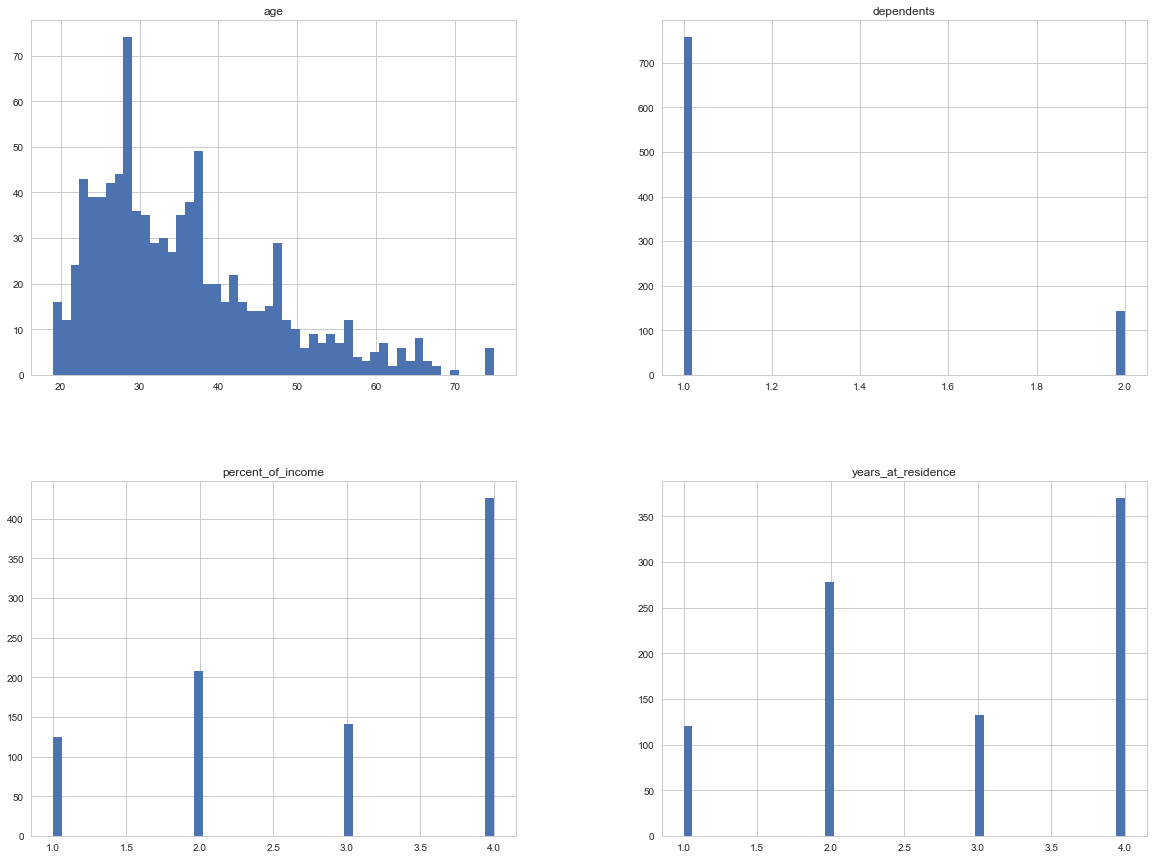

In [37]:
num_nasabah.hist(bins=50, figsize=(20,15))

### Age
Change into categorical data

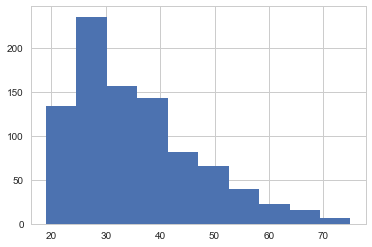

In [38]:
num_nasabah['age'].hist()

In [39]:
# set up bins
bin = [15, 30, 45, 60, 75]

# use pd.cut
cat_age = pd.cut(num_nasabah['age'], bin)
cat_age = cat_age.to_frame()
cat_age.columns = ['cat_age']

# concatenate age and its bin
num_nasabah = pd.concat([num_nasabah, cat_age], axis=1)

c:\users\yasir\anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


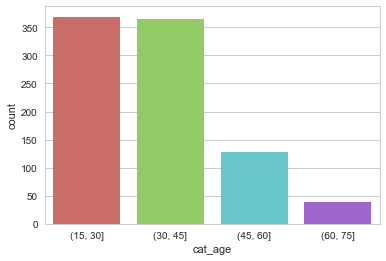

In [40]:
# draw histogram plot
sns.countplot(x ='cat_age', data=num_nasabah, palette='hls')
plt.show()

In [41]:
num_nasabah['cat_age'].value_counts()

(15, 30]    369
(30, 45]    365
(45, 60]    128
(60, 75]     38
Name: cat_age, dtype: int64

In [42]:
num_nasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
percent_of_income     900 non-null int64
years_at_residence    900 non-null int64
age                   900 non-null int64
dependents            900 non-null int64
cat_age               900 non-null category
dtypes: category(1), int64(4)
memory usage: 29.1 KB


In [43]:
num_nasabah.head()

,percent_of_income,years_at_residence,age,dependents,cat_age
0,1,2,34,2,"(30, 45]"
1,2,4,24,1,"(15, 30]"
2,4,2,29,1,"(15, 30]"
3,3,2,25,1,"(15, 30]"
4,3,4,52,1,"(45, 60]"


Change categorical age into numerical value

In [44]:
# change into string 'cat_age'
num_nasabah['cat_age'] = num_nasabah['cat_age'].astype(str)

In [45]:
# change '(15, 30]' = 0, '(30, 45]' = 1, '(45, 60]' = 2, '(60, 75]' = 3
num_nasabah['cat_age_num'] = num_nasabah['cat_age'].map({'(15, 30]': 0, '(30, 45]': 1, 
                                                         '(45, 60]': 2, '(60, 75]': 3}).astype(int)
num_nasabah.head()

,percent_of_income,years_at_residence,age,dependents,cat_age,cat_age_num
0,1,2,34,2,"(30, 45]",1
1,2,4,24,1,"(15, 30]",0
2,4,2,29,1,"(15, 30]",0
3,3,2,25,1,"(15, 30]",0
4,3,4,52,1,"(45, 60]",2


In [46]:
num_nasabah_train = num_nasabah.drop(['age', 'cat_age'], axis=1)
num_nasabah_train.head()

,percent_of_income,years_at_residence,dependents,cat_age_num
0,1,2,2,1
1,2,4,1,0
2,4,2,1,0
3,3,2,1,0
4,3,4,1,2


## Merge categorical and numerical data

In [47]:
nasabah_merge = pd.concat([cat_nasabah_train, num_nasabah_train], axis=1)
nasabah_merge.head()

,checking_balance_num,savings_balance_num,credit_history_num,employment_duration_num,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,...,job_management,job_skilled,job_unemployed,job_unskilled,phone_num,default_num,percent_of_income,years_at_residence,dependents,cat_age_num
0,2,2,3,0,0,1,0,0,0,0,...,1,0,0,0,1,1,1,2,2,1
1,0,0,2,3,0,1,0,0,0,0,...,0,0,0,1,0,0,2,4,1,0
2,0,1,0,4,0,0,0,0,1,0,...,0,1,0,0,0,0,4,2,1,0
3,2,2,2,2,0,0,0,0,0,1,...,0,0,0,1,0,0,3,2,1,0
4,1,1,2,4,0,0,0,0,1,0,...,0,0,0,1,0,0,3,4,1,2


In [48]:
nasabah_prepared = nasabah_merge.drop('default_num', axis=1)
nasabah_prepared.head()

,checking_balance_num,savings_balance_num,credit_history_num,employment_duration_num,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,...,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_num,percent_of_income,years_at_residence,dependents,cat_age_num
0,2,2,3,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,2,2,1
1,0,0,2,3,0,1,0,0,0,0,...,1,0,0,0,1,0,2,4,1,0
2,0,1,0,4,0,0,0,0,1,0,...,0,0,1,0,0,0,4,2,1,0
3,2,2,2,2,0,0,0,0,0,1,...,0,0,0,0,1,0,3,2,1,0
4,1,1,2,4,0,0,0,0,1,0,...,0,0,0,0,1,0,3,4,1,2


In [49]:
nasabah_labels = nasabah_merge['default_num']
nasabah_labels.head()

0    1
1    0
2    0
3    0
4    0
Name: default_num, dtype: int32

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
tree_reg = DecisionTreeClassifier(random_state=42)
tree_reg.fit(nasabah_prepared, nasabah_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

# Fine-tune model

In [52]:
from  sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, nasabah_prepared, nasabah_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [53]:
tree_rmse_scores

array([0.61124985, 0.5836603 , 0.62017367, 0.64978629, 0.54772256,
       0.64978629, 0.51639778, 0.58058475, 0.60892242, 0.59962535])

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = [
              {'max_depth': [1, 2, 3, 4, 5], 'max_features': [2, 4, 6, 8]},
              {'criterion': ['entropy'], 'max_depth': [2, 4], 'max_features': [2, 3, 4]}
             ]

tree_class = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(tree_class, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(nasabah_prepared, nasabah_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5], 'max_features': [2, 4, 6, 8]}, {'criterion': ['entropy'], 'max_depth': [2, 4], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [56]:
grid_search.best_params_

{'max_depth': 3, 'max_features': 6}

In [57]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [58]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5507570547286103 {'max_depth': 1, 'max_features': 2}
0.5507570547286103 {'max_depth': 1, 'max_features': 4}
0.5507570547286103 {'max_depth': 1, 'max_features': 6}
0.5507570547286103 {'max_depth': 1, 'max_features': 8}
0.5507570547286103 {'max_depth': 2, 'max_features': 2}
0.5507570547286103 {'max_depth': 2, 'max_features': 4}
0.5507570547286103 {'max_depth': 2, 'max_features': 6}
0.5426273532033236 {'max_depth': 2, 'max_features': 8}
0.5507570547286103 {'max_depth': 3, 'max_features': 2}
0.5557777333511023 {'max_depth': 3, 'max_features': 4}
0.5416025603090641 {'max_depth': 3, 'max_features': 6}
0.5666666666666667 {'max_depth': 3, 'max_features': 8}
0.5686240703077327 {'max_depth': 4, 'max_features': 2}
0.5487359211051442 {'max_depth': 4, 'max_features': 4}
0.5497474167490214 {'max_depth': 4, 'max_features': 6}
0.5763872155263527 {'max_depth': 4, 'max_features': 8}
0.5830951894845301 {'max_depth': 5, 'max_features': 2}
0.5666666666666667 {'max_depth': 5, 'max_features': 4}
0.56371781

# Test

In [59]:
df_test = pd.read_csv('dataset2/test2.csv')

In [60]:
df_test.head()

,Unnamed: 0,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,2,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
1,13,1 - 200 DM,12,good,furniture/appliances,1567,< 100 DM,1 - 4 years,1,1,22,none,own,1,skilled,1,yes,no
2,16,< 0 DM,24,good,furniture/appliances,1282,100 - 500 DM,1 - 4 years,4,2,32,none,own,1,unskilled,1,no,yes
3,24,1 - 200 DM,12,critical,car,1804,100 - 500 DM,< 1 year,3,4,44,none,own,1,skilled,1,no,no
4,25,unknown,10,critical,furniture/appliances,2069,unknown,1 - 4 years,2,1,26,none,own,2,skilled,1,no,no


In [61]:
nasabah_test = df_test[used_variables]
nasabah_test.head()

,checking_balance,savings_balance,credit_history,purpose,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,job,dependents,phone,default
0,1 - 200 DM,< 100 DM,good,furniture/appliances,1 - 4 years,2,2,22,none,own,skilled,1,no,yes
1,1 - 200 DM,< 100 DM,good,furniture/appliances,1 - 4 years,1,1,22,none,own,skilled,1,yes,no
2,< 0 DM,100 - 500 DM,good,furniture/appliances,1 - 4 years,4,2,32,none,own,unskilled,1,no,yes
3,1 - 200 DM,100 - 500 DM,critical,car,< 1 year,3,4,44,none,own,skilled,1,no,no
4,unknown,unknown,critical,furniture/appliances,1 - 4 years,2,1,26,none,own,skilled,1,no,no


In [62]:
nasabah_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
checking_balance       100 non-null object
savings_balance        100 non-null object
credit_history         100 non-null object
purpose                100 non-null object
employment_duration    100 non-null object
percent_of_income      100 non-null int64
years_at_residence     100 non-null int64
age                    100 non-null int64
other_credit           100 non-null object
housing                100 non-null object
job                    100 non-null object
dependents             100 non-null int64
phone                  100 non-null object
default                100 non-null object
dtypes: int64(4), object(10)
memory usage: 11.0+ KB


# Preprocessing Data Test

## Categorical Data

In [63]:
cat_nasabah_test = nasabah_test.select_dtypes(include=['object']).copy()
cat_nasabah_test.head()

,checking_balance,savings_balance,credit_history,purpose,employment_duration,other_credit,housing,job,phone,default
0,1 - 200 DM,< 100 DM,good,furniture/appliances,1 - 4 years,none,own,skilled,no,yes
1,1 - 200 DM,< 100 DM,good,furniture/appliances,1 - 4 years,none,own,skilled,yes,no
2,< 0 DM,100 - 500 DM,good,furniture/appliances,1 - 4 years,none,own,unskilled,no,yes
3,1 - 200 DM,100 - 500 DM,critical,car,< 1 year,none,own,skilled,no,no
4,unknown,unknown,critical,furniture/appliances,1 - 4 years,none,own,skilled,no,no


In [64]:
list_cat_nasabah_test = list(cat_nasabah_test)
list_cat_nasabah_test.remove('purpose')
list_cat_nasabah_test.remove('other_credit')
list_cat_nasabah_test.remove('housing')
list_cat_nasabah_test.remove('job')
list_cat_nasabah_test

['checking_balance',
 'savings_balance',
 'credit_history',
 'employment_duration',
 'phone',
 'default']

### Data interval

Change data into numerical using Label Encoding

In [65]:
# change 'unknown' = 0, '< 0 DM' = 1, '1 - 200 DM' = 2, '> 200 DM' = 3 
cat_nasabah_test['checking_balance_num'] = cat_nasabah_test['checking_balance'].map({'unknown': 0, '< 0 DM': 1, '1 - 200 DM': 2, '> 200 DM': 3}).astype(int)

# change 'unknown' = 0, '< 100 DM' = 1, '100 - 500 DM' = 2, '500 - 1000 DM' = 3, '> 1000 DM' =  4
cat_nasabah_test['savings_balance_num'] = cat_nasabah_test['savings_balance'].map({'unknown': 0, '< 100 DM': 1, 
                                                                         '100 - 500 DM': 2, '500 - 1000 DM': 3,
                                                                         '> 1000 DM': 4}).astype(int)

# change 'critical' = 0, 'poor' = 1, 'good' = 2, 'very good' = 3, 'perfect' =  4
cat_nasabah_test['credit_history_num'] = cat_nasabah_test['credit_history'].map({'critical': 0, 'poor': 1, 
                                                                         'good': 2, 'very good': 3,
                                                                         'perfect': 4}).astype(int)

# change 'unemployed' = 0, '< 1 year' = 1, '1 - 4 years' = 2, '4 - 7 years' = 3, '> 7 years' =  4
cat_nasabah_test['employment_duration_num'] = cat_nasabah_test['employment_duration'].map({'unemployed': 0, '< 1 year': 1, 
                                                                         '1 - 4 years': 2, '4 - 7 years': 3,
                                                                         '> 7 years': 4}).astype(int)

# cat_nasabah_test.head()

### Data Categorical

Change data into numerical using One Hot Encoding

In [66]:
cat_nasabah_test = pd.get_dummies(cat_nasabah_test, columns=['purpose'], prefix=['purpose'])
cat_nasabah_test = pd.get_dummies(cat_nasabah_test, columns=['other_credit'], prefix=['other_credit'])
cat_nasabah_test = pd.get_dummies(cat_nasabah_test, columns=['housing'], prefix=['housing'])
cat_nasabah_test = pd.get_dummies(cat_nasabah_test, columns=['job'], prefix=['job'])
# cat_nasabah_test.head()

### Data Boolean

Change 'yes' into 1 and 'no' into 0

In [67]:
# change 'yes' = 1, 'no' = 0
cat_nasabah_test['phone_num'] = cat_nasabah_test['phone'].map({'yes': 1, 'no': 0}).astype(int)
cat_nasabah_test['default_num'] = cat_nasabah_test['default'].map({'yes': 1, 'no': 0}).astype(int)
# cat_nasabah_test.head()

In [68]:
cat_nasabah_test = cat_nasabah_test.drop(list_cat_nasabah_test, axis=1)
cat_nasabah_test.head()

,checking_balance_num,savings_balance_num,credit_history_num,employment_duration_num,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,...,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_num,default_num
0,2,1,2,2,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,2,1,2,2,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,1,2,2,2,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
3,2,2,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,2,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


## Numerical Data

In [69]:
num_nasabah_test = nasabah_test.select_dtypes(include=['int64']).copy()
num_nasabah_test.head()

,percent_of_income,years_at_residence,age,dependents
0,2,2,22,1
1,1,1,22,1
2,4,2,32,1
3,3,4,44,1
4,2,1,26,1


### Age
Change into categorical data

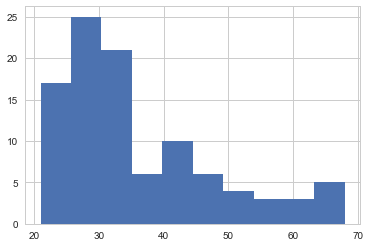

In [70]:
num_nasabah_test['age'].hist()

In [71]:
# set up bins
bin = [15, 30, 45, 60, 75]

# use pd.cut
cat_age = pd.cut(num_nasabah_test['age'], bin)
cat_age = cat_age.to_frame()
cat_age.columns = ['cat_age']

# concatenate age and its bin
num_nasabah_test = pd.concat([num_nasabah_test, cat_age], axis=1)

c:\users\yasir\anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


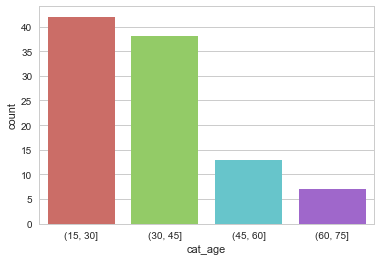

In [72]:
# draw histogram plot
sns.countplot(x ='cat_age', data=num_nasabah_test, palette='hls')
plt.show()

Change categorical age into numerical value

In [73]:
# change into string 'cat_age'
num_nasabah_test['cat_age'] = num_nasabah_test['cat_age'].astype(str)

# change '(15, 30]' = 0, '(30, 45]' = 1, '(45, 60]' = 2, '(60, 75]' = 3
num_nasabah_test['cat_age_num'] = num_nasabah_test['cat_age'].map({'(15, 30]': 0, '(30, 45]': 1, 
                                                         '(45, 60]': 2, '(60, 75]': 3}).astype(int)
# num_nasabah_test.head()

In [74]:
num_nasabah_test = num_nasabah_test.drop(['age', 'cat_age'], axis=1)
num_nasabah_test.head()

,percent_of_income,years_at_residence,dependents,cat_age_num
0,2,2,1,0
1,1,1,1,0
2,4,2,1,1
3,3,4,1,1
4,2,1,1,0


## Merge categorical and numerical data

In [75]:
nasabah_test_merge = pd.concat([cat_nasabah_test, num_nasabah_test], axis=1)
nasabah_test_merge.head()

,checking_balance_num,savings_balance_num,credit_history_num,employment_duration_num,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,...,job_management,job_skilled,job_unemployed,job_unskilled,phone_num,default_num,percent_of_income,years_at_residence,dependents,cat_age_num
0,2,1,2,2,0,0,0,0,1,0,...,0,1,0,0,0,1,2,2,1,0
1,2,1,2,2,0,0,0,0,1,0,...,0,1,0,0,1,0,1,1,1,0
2,1,2,2,2,0,0,0,0,1,0,...,0,0,0,1,0,1,4,2,1,1
3,2,2,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,3,4,1,1
4,0,0,0,2,0,0,0,0,1,0,...,0,1,0,0,0,0,2,1,1,0


In [76]:
nasabah_test_prepared = nasabah_test_merge.drop('default_num', axis=1)
nasabah_test_prepared.head()

,checking_balance_num,savings_balance_num,credit_history_num,employment_duration_num,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,...,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_num,percent_of_income,years_at_residence,dependents,cat_age_num
0,2,1,2,2,0,0,0,0,1,0,...,0,0,1,0,0,0,2,2,1,0
1,2,1,2,2,0,0,0,0,1,0,...,0,0,1,0,0,1,1,1,1,0
2,1,2,2,2,0,0,0,0,1,0,...,0,0,0,0,1,0,4,2,1,1
3,2,2,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,3,4,1,1
4,0,0,0,2,0,0,0,0,1,0,...,0,0,1,0,0,0,2,1,1,0


In [77]:
nasabah_test_labels = nasabah_test_merge['default_num']
nasabah_test_labels.head()

0    1
1    0
2    1
3    0
4    0
Name: default_num, dtype: int32

# Predict

In [78]:
final_model = grid_search.best_estimator_
predictions = final_model.predict(nasabah_test_prepared)

# Accuracy Score

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(nasabah_test_labels, predictions)

0.69

In [81]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(nasabah_test_labels, predictions).ravel()

print(tn, fp, fn, tp)

62 11 20 7


## Question 8
Diberikan cross tabulasi perbandingan klasifikasi default hasil prediksi dan aktual menggunakan model decision tree sebagai berikut:

|   |   |actual   |
|----|:-:|:-:|---|---|
|   |   | no  | yes  |   |
| predicted  | no  | 57  | 12  |   |
|   | yes  | 16  | 15  |   |

Berapa banyak observasi yang yang salah diklasifikasikan oleh model decision tree tersebut?

**Answer**: 28

In [82]:
# banyak observasi yang salah diklasifikasikan = False positive + False negative
result = 12 + 16
result

28

## Question 9
Berdasarkan tabel cross tabulasi sebelumnya, metrik pengukuran apa yang dapat digunakan sebagai pertimbangan pemilihan model?

**Answer**: accuracy 72%, recall 55%

In [83]:
accuracy = (57+15)/(57+12+16+15)
accuracy

0.72

In [84]:
precision = 15/(15+16)
precision

0.4838709677419355

In [85]:
recall = 15/(15+12)
recall

0.5555555555555556

## Question 10
Metode yang tidak tepat untuk mengevaluasi masalah klasifikasi dan membandingkan performa klasifier adalah :

**Answer**: R-squared